## First, load the data and make the plots as they match the Jensen and Janes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.io
from matplotlib.colors import ListedColormap
import seaborn as sns


# load the colormap 
# This can be used to setup the exact color map
array_map_file = 'arraymap.mat'
array_map = scipy.io.loadmat(array_map_file)
custom_cmap = ListedColormap(array_map['arraymap'])

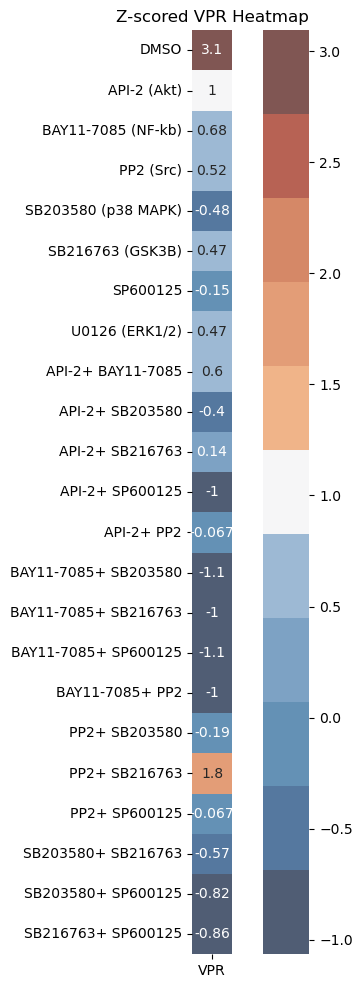

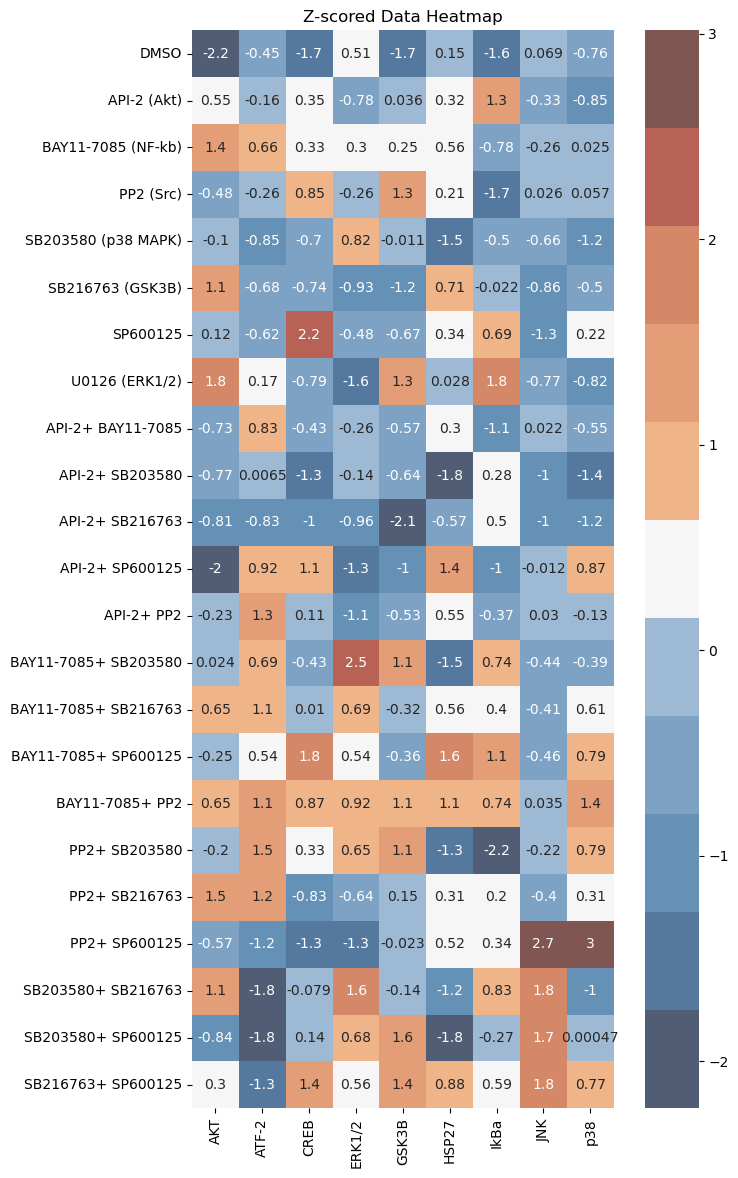

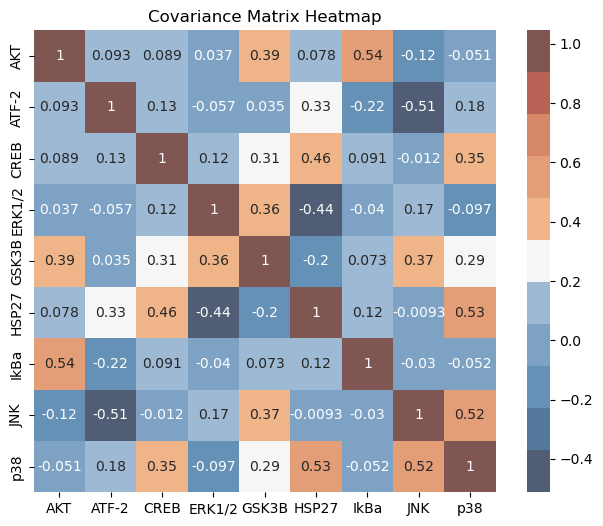

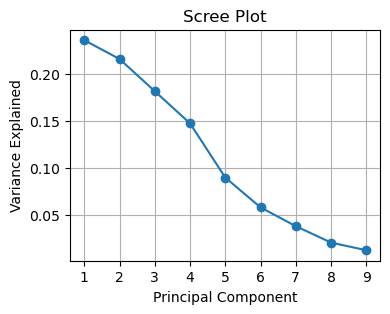

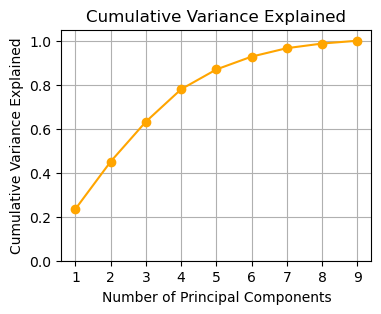

In [15]:
#load the dataframe
data = pd.read_csv('Jensen_Janes_data_integral.csv', index_col=0)
vpr = pd.read_csv('Jensen_Janes_VPR.csv', index_col=0)

#take the zscore of the data and the VPR and plot these.
df_VPR_zscore = vpr.apply(stats.zscore, axis=0, nan_policy='omit')
df_data_zscore = data.apply(stats.zscore, axis=0, nan_policy='omit')

plot_data_heatmap(df_data_zscore, df_VPR_zscore, custom_cmap)

eigval, eigvec = pca(df_data_zscore, custom_cmap)



In [11]:
def plot_data_heatmap(data, y, cmap):
    # Display the zscored data with a heatmap (in the data frame), here picking a color scheme that approximates that used
    # by Jensen and Janes
    # Put the VPR data on a subplot
    plt.figure(figsize=(8, 12))
    sns.heatmap(y, annot=True, cmap=cmap, square=True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Z-scored VPR Heatmap')
    plt.show()  
    plt.figure(figsize=(8, 14))
    sns.heatmap(data, annot=True, cmap=cmap, square=True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Z-scored Data Heatmap')
    plt.show() 



In [ ]:
def pca_by_eig(data, custom_cmap):
    """
    Perform PCA on the given dataset and plot the covariance matrix heatmap,
    scree plot, and cumulative variance explained plot.
    Parameters:
    data (pd.DataFrame): The input dataset where rows are samples and columns are features.
    Returns:
    eigVals (np.ndarray): The sorted eigenvalues.
    eigVec (np.ndarray): The corresponding sorted eigenvectors.

    """

    S = data.cov()
    plt.figure(figsize=(8, 6))
    sns.heatmap(S, annot=True, cmap=custom_cmap, square=True)
    plt.title('Covariance Matrix Heatmap')
    plt.show()

    eigVals, eigVec = np.linalg.eig(S)

    # sort the eigenvalues in descending order, use the same for the sorted eigenvectors
    sorted_indices = np.argsort(eigVals)[::-1]
    eigVals = eigVals[sorted_indices]
    eigVec = eigVec[:, sorted_indices]

    # make some plots of variance described
    var_explained = eigVals / np.sum(eigVals)
    plt.figure(figsize=(4, 3))
    plt.plot(range(1, len(var_explained) + 1), var_explained, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.xticks(range(1, len(var_explained) + 1))
    plt.grid()
    plt.show()

    # Make the cumulative variance explained plot
    cum_var_explained = np.cumsum(var_explained)
    plt.figure(figsize=(4, 3))
    plt.plot(range(1, len(cum_var_explained) + 1), cum_var_explained, marker='o', color='orange')
    plt.title('Cumulative Variance Explained')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.xticks(range(1, len(cum_var_explained) + 1))
    plt.ylim(0, 1.05)
    plt.grid()
    plt.show()  

    return eigVals, eigVec

## Repeat PCA removing the high variance DMSO control condition


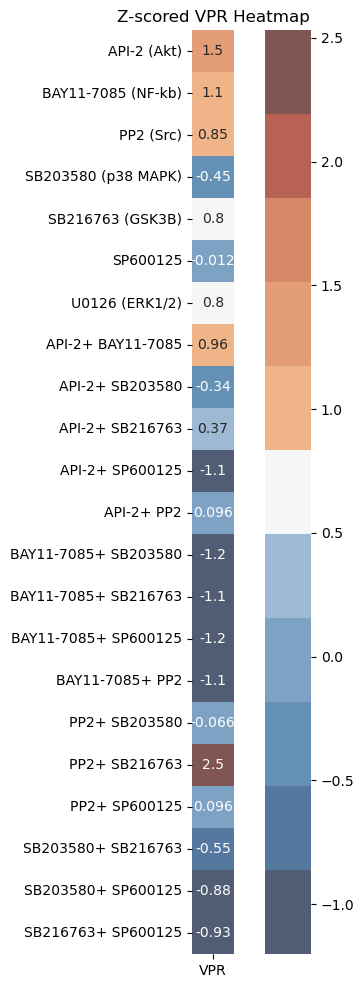

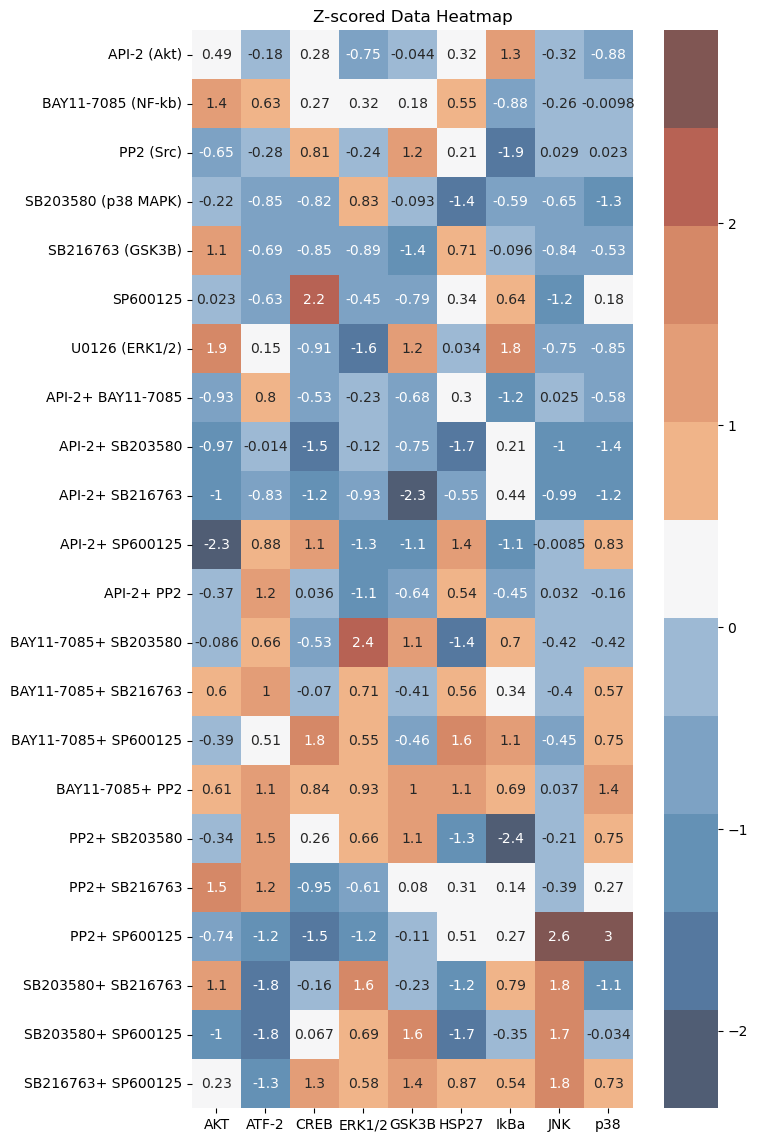

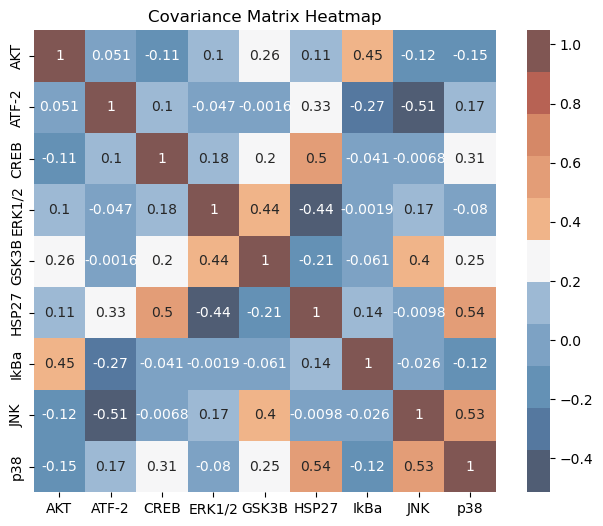

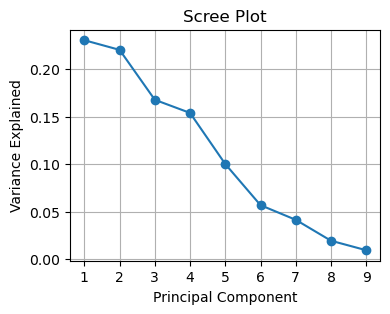

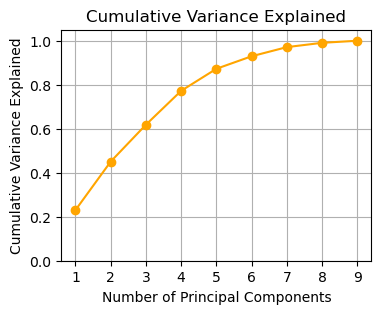

In [19]:
# Jensen and Janes threw out the DMSO control condition since it creates extreme variance and they 
# were interested in the differences between the drug conditions. We will do the same here.
data_sub = data.drop(index=['DMSO'])
vpr_sub = vpr.drop(index=['DMSO'])

#take the zscore of the data and the VPR and plot these.
df_VPR_sub_zscore = vpr_sub.apply(stats.zscore, axis=0, nan_policy='omit')
df_data_sub_zscore = data_sub.apply(stats.zscore, axis=0, nan_policy='omit')

plot_data_heatmap(df_data_sub_zscore, df_VPR_sub_zscore, custom_cmap)

eigval, eigvec = pca(df_data_sub_zscore, custom_cmap)


## PCA using sklearn

In [ ]:
from sklearn.decomposition import PCA


In [17]:
data_sub

,AKT,ATF-2,CREB,ERK1/2,GSK3B,HSP27,IkBa,JNK,p38
API-2 (Akt),193.833056,316.724573,137.990806,74.482494,89.504915,134.768089,203.733509,95.285010,627.610264
BAY11-7085 (NF-kb),223.273403,385.029048,137.410578,141.255027,93.853180,146.612164,153.016340,97.657847,1055.572416
PP2 (Src),156.866620,308.374795,158.633846,106.303860,114.319547,128.855753,129.967561,107.640407,1071.483277
SB203580 (p38 MAPK),170.569700,259.485990,94.806097,172.910690,88.555254,42.698096,159.707154,84.033480,437.532073
SB216763 (GSK3B),214.647075,273.583114,93.389362,65.607369,63.697069,154.712477,171.347716,77.247852,799.771339
SP600125,178.555419,278.596625,213.396368,92.876112,75.142544,135.522981,188.617823,63.163854,1149.875904
U0126 (ERK1/2),238.880397,344.263644,91.291940,21.805747,114.316515,119.658786,214.930828,80.515353,642.487819
API-2+ BAY11-7085,147.766811,399.423231,106.128873,106.446268,77.326988,133.405933,146.056810,107.499558,775.355564
API-2+ SB203580,146.331350,330.644064,68.529038,113.682541,75.857098,27.411399,178.608387,70.860733,374.153616
API-2+ SB216763,145.083956,261.181146,80.989368,63.288899,46.626680,89.262499,183.950804,72.104053,448.782946


In [44]:
vpr

,VPR
DMSO,1.00
API-2 (Akt),0.50
BAY11-7085 (NF-kb),0.42
PP2 (Src),0.38
SB203580 (p38 MAPK),0.14
SB216763 (GSK3B),0.37
SP600125,0.22
U0126 (ERK1/2),0.37
API-2+ BAY11-7085,0.40
API-2+ SB203580,0.16


## Setup the covariance matrix, find the eigenvectors and values 

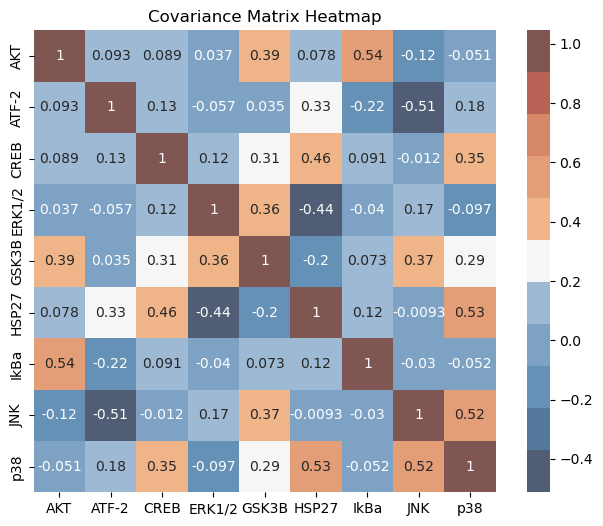

In [29]:
S = df_data_zscore.cov()
plt.figure(figsize=(8, 6))
sns.heatmap(S, annot=True, cmap=custom_cmap, square=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

Eigenvalues are sorted in descending order.


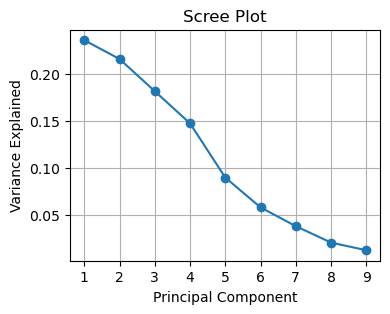

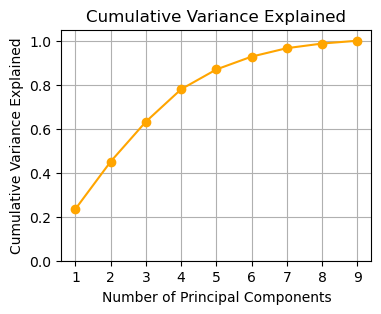

In [ ]:
#Check eigVals, are they sorted and in which order (ascending/descending) -- here shows it is in descending
# so the 0th eigenvector is PC1. 
eigVals
if eigVals[0] > eigVals[1]:
    print("Eigenvalues are sorted in descending order.")
else:
    print("Eigenvalues are not sorted in descending order.")
# make the scree plot, % variance explained by each PC


In [22]:
#Calculate the scores by matrix multiplication of the zscore data and the eigenvectors
T = np.matmul(zscore_df.values, eigVec)

NameError: name 'zscore_df' is not defined